### TED_Main.csv Data Analysis

In [103]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import json
from pandas.io.json import json_normalize

#### Possible question that can be Answered from the data

1. Find which area has more TED talks being released.
2. Which TED talk has more influence on the crowd taking the number of views into consideration?
3. What is making the TED talks popular, considering the duration on talk and then day or time it is made available?
4. We could also do topic modelling or clustering the TED talks to see a trend of how it covers the areas from science to business to global issues.
5. Is the TED talk on global issues more popular and speakers from which fields are more leaned toward it?
6. We could also use the speaker’s name to find the gender of the speaker, which could further lead to take out inference like which gender has more popular and powerful speakers.

In [116]:
df1 = pd.read_csv('dataset/ted_main.csv')
df1.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [117]:
df1.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


### Columns description for the ted_main.csv files i.e, the features available
- comments: comments made on the talk
- description: Talk description
- duration: Talk duration in seconds.
- event: Cointains the TED talk id of the event where the event took place.
- film_date: It shows the date of recording of the talk and is present in the UNIX Timestamp 
- languages: The number of languages in which the talk is available.
- main_speaker: Name of the speaker of the talk.
- name: name of the TED Talk (contains title and the speaker)
- num_speaker: The number of speakers giving the TED talk.
- published_date: This date is present in the UNIX timestamp in the original dataset and contains the date of publication of TED talk on TED website
- ratings: Various ratings given to the talk, present in the dictionary format in the talk (JSON Dictionary format)
- related_talks: list containing recommended talks to watch next.
- speaker_occupation: Speacker occupation
- tags: Tages associated with the talk.
- title: Ted talk title
- url: The URL of the talk.
- views: The number of view   

### Let's check for any null value in any of the column now.

In [118]:
df1.isnull().values.any()

True

In [119]:
#column wise analysis for number of NaNs 
df1.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [120]:
# Sum of all the NaN Present in the table
df1.isnull().sum().sum()

6

In [138]:
df1.dropna(inplace=True)

In [139]:
df1.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
published_year        0
dtype: int64

In [140]:
df1.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date             object
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date        object
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
published_year        object
dtype: object

In [121]:
#Converting Unite timestamp to human readable date and time 
import datetime as dt

df1['film_date'] = df1['film_date'].apply(lambda x: dt.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df1['published_year'] = df1['published_date'].apply(lambda x: dt.datetime.fromtimestamp(int(x)).strftime('%Y'))
df1['published_date'] = df1['published_date'].apply(lambda x: dt.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df1.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,published_year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006


In [122]:
len(df1)

2550

In [123]:
df1['published_year'].value_counts()

2012    306
2011    261
2010    257
2013    244
2016    243
2014    240
2009    222
2015    220
2017    197
2008    188
2007    122
2006     50
Name: published_year, dtype: int64

### Plots against the Event Year when it was actually happened, How long the TED talk went, number of languages it is released in, number of views, number of response received over them

In [125]:
years = dict(df1['published_year'].value_counts()).keys()
year_cnt = dict(df1['published_year'].value_counts()).values()
# years, year_cnt
year_dict = dict(df1['published_year'].value_counts())
# print(year_dict)

year_d = dict(sorted(year_dict.items()))
# from collections import OrderedDict
# year_d = dict(OrderedDict(sorted(year_dict.items(), key=lambda t: t[0])))
# print(year_d)

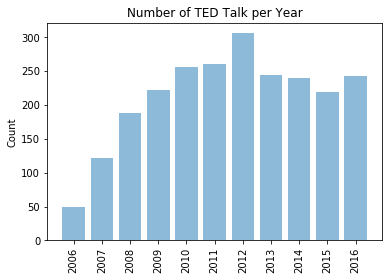

In [126]:
import numpy as np
years = list(year_d.keys())[:len(year_d)-1]
y_pos = np.arange(len(years))
year_cnt = list(year_d.values())[:len(years)]

plt.bar(y_pos,year_cnt, align = 'center', alpha = 0.5)
plt.xticks(y_pos, years, rotation = 90)
plt.ylabel('Count')
plt.title('Number of TED Talk per Year')
plt.show()

#### Number of TED Talk view

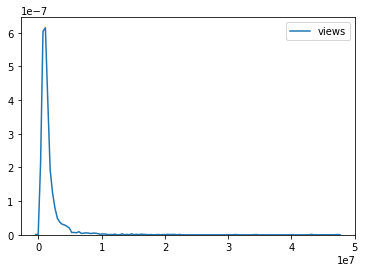

In [127]:
sns.kdeplot(df1['views'])

Text(0, 0.5, 'Number of TED Talks')

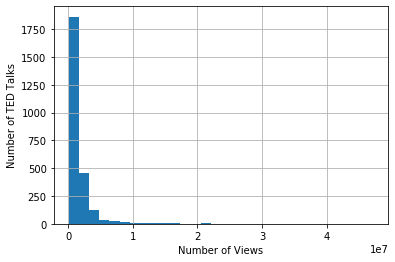

In [134]:
ax = df1['views'].hist(bins=30)
ax.set_xlabel("Number of Views")
ax.set_ylabel("Number of TED Talks")

Text(0, 0.5, 'Number of TED Talks')

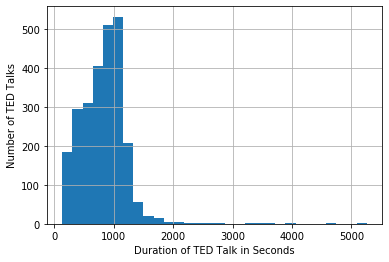

In [135]:
ax = df1['duration'].hist(bins=30)
ax.set_xlabel("Duration of TED Talk in Seconds")
ax.set_ylabel("Number of TED Talks")

Text(0, 0.5, 'Number of TED Talks')

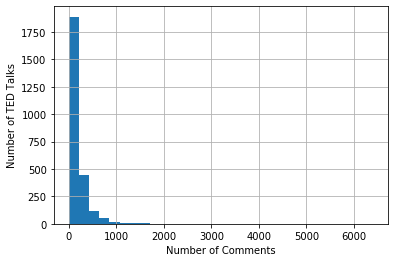

In [136]:
ax = df1['comments'].hist(bins=30)
ax.set_xlabel("Number of Comments")
ax.set_ylabel("Number of TED Talks")

Text(0, 0.5, 'Number of TED Talks')

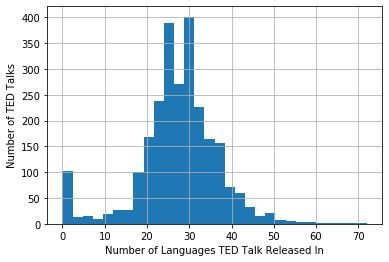

In [137]:
ax = df1['languages'].hist(bins=30)
ax.set_xlabel("Number of Languages TED Talk Released In")
ax.set_ylabel("Number of TED Talks")

In [9]:
#Most Popular Ted Talks
popular_talk = df1[['main_speaker','title', 'views']].sort_values('views', ascending = False)[:10]
popular_talk

,main_speaker,title,views
0,Ken Robinson,Do schools kill creativity?,47227110
1346,Amy Cuddy,Your body language may shape who you are,43155405
677,Simon Sinek,How great leaders inspire action,34309432
837,Brené Brown,The power of vulnerability,31168150
452,Mary Roach,10 things you didn't know about orgasm,22270883
1776,Julian Treasure,How to speak so that people want to listen,21594632
201,Jill Bolte Taylor,My stroke of insight,21190883
5,Tony Robbins,Why we do what we do,20685401
2114,James Veitch,This is what happens when you reply to spam email,20475972
1416,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",19787465


### There are only two speakers whose Ted talk views have crossed 40 Million Mark

<Figure size 432x288 with 0 Axes>

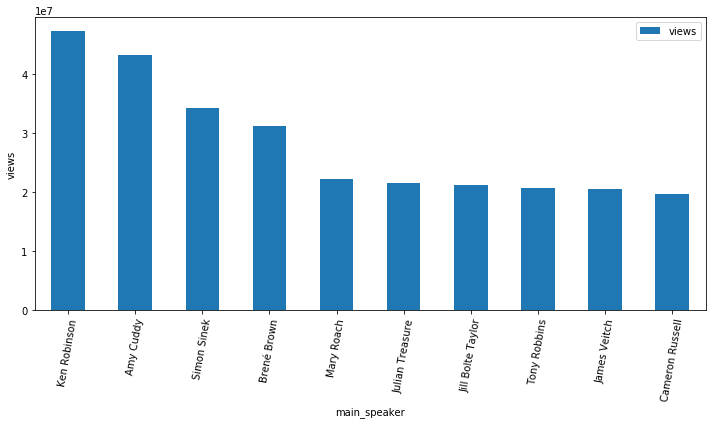

In [10]:
ax = plt.figure()
ax = popular_talk.plot(kind='bar',x='main_speaker', y='views',figsize=[10,6])
ax.set_xlabel("main_speaker")
ax.set_ylabel("views")
ax.set_xticklabels(popular_talk['main_speaker'], rotation= 80)
ax = plt.tight_layout()
ax = plt.show()

In [11]:
df1['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

#### The above visulaization of views suggests a very high average level of popularity of TED Talks.  We see the average number of TED Talks views is 1.6 million. 

In [12]:
#Now considering the comments and analyszing the relation between views and comments
df1['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

#### So we observe that  average number of comments is 191.56 with a high standard deviation of around 282, a value even higher than mean, thus suggesting it may be sensitive to outliers. The minimum number of commenst on any Ted talk is 2 and the maimum is 6404, so there is huge variation between minumum and maximum comments made on Ted talk. Median of comments is 118

In [13]:
df1['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [141]:
# Does Most Popular Ted Talks has release in more languages
popular_talk1 = df1[['main_speaker','title', 'views', 'languages']].sort_values('languages', ascending = False)[:10]
popular_talk1

,main_speaker,title,views,languages
973,Matt Cutts,Try something new for 30 days,8838874,72
606,Derek Sivers,"Weird, or just different?",2835976,69
47,Richard St. John,8 secrets of success,10841210,66
653,Derek Sivers,How to start a movement,6475731,65
479,Arthur Benjamin,Teach statistics before calculus!,2175141,64
239,Murray Gell-Mann,The ancestor of language,785293,61
0,Ken Robinson,Do schools kill creativity?,47227110,60
940,Terry Moore,How to tie your shoes,6263759,59
758,Derek Sivers,Keep your goals to yourself,4657799,58
654,Adora Svitak,What adults can learn from kids,4782854,58


<Figure size 432x288 with 0 Axes>

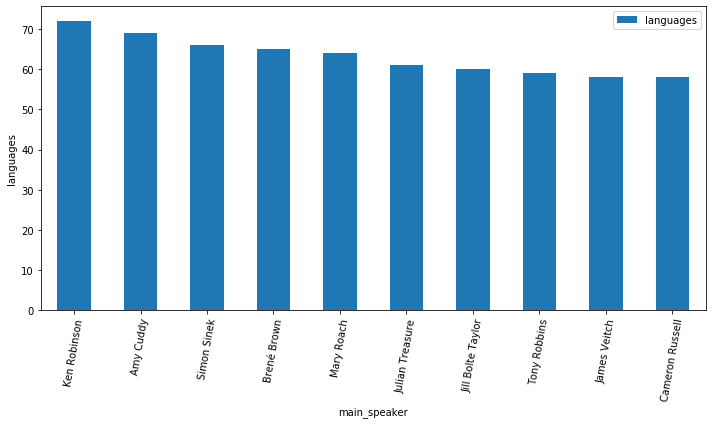

In [142]:
ax = plt.figure()
ax = popular_talk1.plot(kind='bar',x='main_speaker', y='languages',figsize=[10,6])
ax.set_xlabel("main_speaker")
ax.set_ylabel("languages")
ax.set_xticklabels(popular_talk['main_speaker'], rotation= 80)
ax = plt.tight_layout()
ax = plt.show()

### Calculating the Relation between the Features

### 1. Between 'views' and 'comments'

In [16]:
from numpy import cov
covariance = cov(df1['views'], df1['comments'])
covariance

array([[6.24239917e+12, 3.74502264e+08],
       [3.74502264e+08, 7.97018853e+04]])

The covariance between the two variables is positive, suggesting the variables change in the same direction as we expect. This can be further analyzed using Pearson correlation coefficient which is used to summarize the strength of the linear relationship between two data samples.

In [17]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df1['views'], df1['comments'])
print('Pearsons correlation between views & comments: %.3f' % corr)

Pearsons correlation between views & comments: 0.531


#### So, we find that two variables are positively correlated with correlation value as 0.531. This suggests a high level of correlation, e.g. a value above 0.5, which further indicates a medium to strong correlation between the two quantities. Below plot shows how the two variables are correlated using sns joinplot

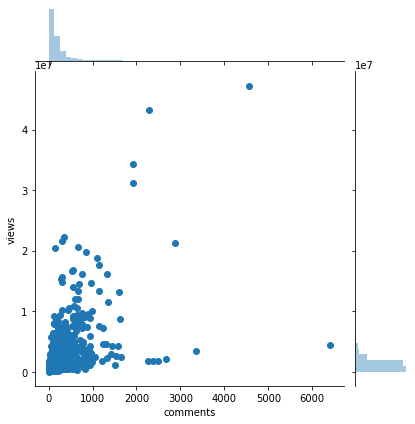

In [18]:
sns.jointplot(data=df1, x='comments', y='views', kind='scatter')

In [19]:
popular_cmnt = df1[['main_speaker','title', 'views', 'comments']].sort_values('comments', ascending = False)
popular_cmnt.head(10)

,main_speaker,title,views,comments
96,Richard Dawkins,Militant atheism,4374792,6404
0,Ken Robinson,Do schools kill creativity?,47227110,4553
644,Sam Harris,Science can answer moral questions,3433437,3356
201,Jill Bolte Taylor,My stroke of insight,21190883,2877
1787,David Chalmers,How do you explain consciousness?,2162764,2673
954,Janet Echelman,Taking imagination seriously,1832930,2492
840,Lesley Hazleton,On reading the Koran,1847256,2374
1346,Amy Cuddy,Your body language may shape who you are,43155405,2290
661,Michael Specter,The danger of science denial,1838628,2272
677,Simon Sinek,How great leaders inspire action,34309432,1930


### 2. Between 'views' and 'languages'

In [20]:
from numpy import cov
covar1 = cov(df1['views'], df1['languages'])
covar2 = cov(df1['comments'], df1['languages'])
covar1, covar2

(array([[6.24239917e+12, 9.02295794e+06],
        [9.02295794e+06, 9.14596075e+01]]),
 array([[79701.88528281,   859.33821983],
        [  859.33821983,    91.45960754]]))

In [21]:
from scipy.stats import pearsonr
corr1, _ = pearsonr(df1['views'], df1['languages'])
print('Pearsons correlation between views & languages: %.3f' % corr1)
corr2, _ = pearsonr(df1['comments'], df1['languages'])
print('Pearsons correlation between comments & languages: %.3f' % corr2)

Pearsons correlation between views & languages: 0.378
Pearsons correlation between comments & languages: 0.318


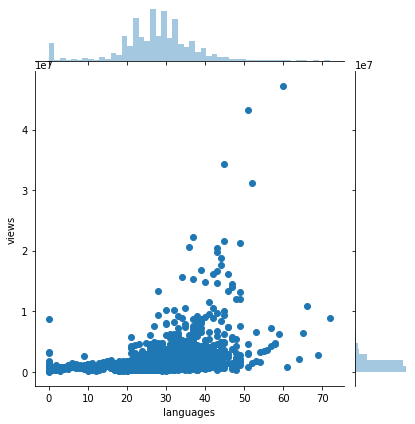

In [22]:
sns.jointplot(data=df1, x='languages', y='views', kind='scatter')

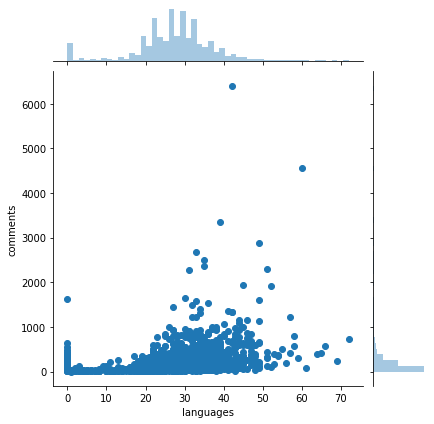

In [23]:
sns.jointplot(data=df1, x='languages', y='comments', kind='scatter')

#### Observation - 

In [24]:
popular_lang = df1[['main_speaker','title', 'views', 'comments','languages']].sort_values('languages', ascending = False)
popular_lang.head(10)

,main_speaker,title,views,comments,languages
973,Matt Cutts,Try something new for 30 days,8838874,736,72
606,Derek Sivers,"Weird, or just different?",2835976,238,69
47,Richard St. John,8 secrets of success,10841210,578,66
653,Derek Sivers,How to start a movement,6475731,422,65
479,Arthur Benjamin,Teach statistics before calculus!,2175141,398,64
239,Murray Gell-Mann,The ancestor of language,785293,76,61
0,Ken Robinson,Do schools kill creativity?,47227110,4553,60
940,Terry Moore,How to tie your shoes,6263759,309,59
758,Derek Sivers,Keep your goals to yourself,4657799,582,58
654,Adora Svitak,What adults can learn from kids,4782854,795,58


### 3. Between 'views' and 'durations'

In [25]:
df1['duration'] = df1['duration'].apply(lambda s: s/60)
from numpy import cov
covar3 = cov(df1['views'], df1['duration'])
covar3

array([[6.24239917e+12, 7.59094909e+05],
       [7.59094909e+05, 3.88563431e+01]])

In [26]:
from scipy.stats import pearsonr
corr3, _ = pearsonr(df1['views'], df1['duration'])
print('Pearsons correlation between views & duration: %.3f' % corr3)

Pearsons correlation between views & duration: 0.049


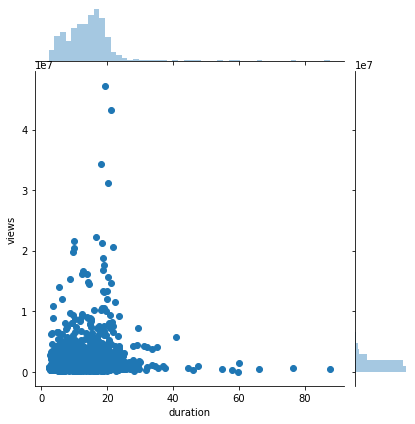

In [27]:
sns.jointplot(data=df1, x='duration', y='views', kind='scatter')

#### Observation - so can be observed that the number of views decreases with increase in the duration of talk. So the ted talks which are more popular should have smaller duration talks than others.

In [28]:
popular_talk2 = df1[['main_speaker','title', 'views','duration']].sort_values('views', ascending = False)
popular_talk2.head(10)

,main_speaker,title,views,duration
0,Ken Robinson,Do schools kill creativity?,47227110,19.400000
1346,Amy Cuddy,Your body language may shape who you are,43155405,21.033333
677,Simon Sinek,How great leaders inspire action,34309432,18.066667
837,Brené Brown,The power of vulnerability,31168150,20.316667
452,Mary Roach,10 things you didn't know about orgasm,22270883,16.716667
1776,Julian Treasure,How to speak so that people want to listen,21594632,9.966667
201,Jill Bolte Taylor,My stroke of insight,21190883,18.316667
5,Tony Robbins,Why we do what we do,20685401,21.750000
2114,James Veitch,This is what happens when you reply to spam email,20475972,9.800000
1416,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",19787465,9.616667


#### This doesn't seems to be necessarily TRUE though from the above sorted table on views

In [29]:
df1.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


### Month wise analysis of Ted Talks presented

In [30]:
#Month wise analysis of Ted Talks presented
df1['month'] = df1['film_date'].apply(lambda x: int(x.split('-')[1]))
df1.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,month
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2


In [31]:
tedtalk_mon = df1.groupby(['month'])[['views']].sum().reset_index()
# tedtalk_mon = df1.groupby(['month'])[['views']].count().reset_index()
tedtalk_mon.rename(columns = {'month':'Month' , 'views':'Count'}, inplace = True)
tedtalk_mon.sort_values('Month', inplace = True)
tedtalk_mon

,Month,Count
0,1,43972650
1,2,1260064129
2,3,629672845
3,4,226772829
4,5,188845736
5,6,526350794
6,7,392246175
7,8,42204968
8,9,189283280
9,10,310541167


In [32]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mapping = {i+1: month  for i, month in enumerate(months)}
key = tedtalk_mon['Month'].map(mapping)
key

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: Month, dtype: object

<Figure size 432x288 with 0 Axes>

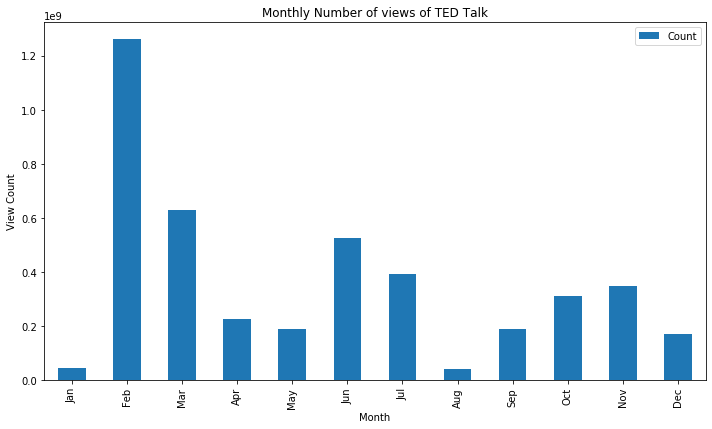

In [33]:
import matplotlib.pyplot as plt
ax = plt.figure()
ax = tedtalk_mon.plot(kind='bar',x='Month', y='Count',figsize=[10,6])
ax.set_xlabel("Month")
ax.set_ylabel("View Count")
ax.set_xticks(np.arange(len(tedtalk_mon['Month'])))
ax.set_xticklabels(key,rotation = 90)
ax = plt.tight_layout()
ax = plt.title("Monthly Number of views of TED Talk")
ax = plt.show()

### Analysis the 'rating' column

In [34]:
import json
from pandas.io.json import json_normalize
import ast

In [35]:
# df1['new_rating'] = df1['ratings'].apply(ast.literal_eval).apply(json.dumps)
# df1['new_rating'].head(2)
df1['ratings'].apply(ast.literal_eval).apply(json.dumps)[0]

'[{"id": 7, "name": "Funny", "count": 19645}, {"id": 1, "name": "Beautiful", "count": 4573}, {"id": 9, "name": "Ingenious", "count": 6073}, {"id": 3, "name": "Courageous", "count": 3253}, {"id": 11, "name": "Longwinded", "count": 387}, {"id": 2, "name": "Confusing", "count": 242}, {"id": 8, "name": "Informative", "count": 7346}, {"id": 22, "name": "Fascinating", "count": 10581}, {"id": 21, "name": "Unconvincing", "count": 300}, {"id": 24, "name": "Persuasive", "count": 10704}, {"id": 23, "name": "Jaw-dropping", "count": 4439}, {"id": 25, "name": "OK", "count": 1174}, {"id": 26, "name": "Obnoxious", "count": 209}, {"id": 10, "name": "Inspiring", "count": 24924}]'

In [36]:
df1.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'month'],
      dtype='object')

In [37]:
df_main = df1[['url','film_date','views','comments','month','duration','languages','title','tags','main_speaker']].copy()
df_main['url'].astype(str)
df_main['main_speaker'].astype(str)
df_main.head(2)

,url,film_date,views,comments,month,duration,languages,title,tags,main_speaker
0,https://www.ted.com/talks/ken_robinson_says_sc...,24-02-2006,47227110,4553,2,19.400000,60,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",Ken Robinson
1,https://www.ted.com/talks/al_gore_on_averting_...,24-02-2006,3200520,265,2,16.283333,43,Averting the climate crisis,"['alternative energy', 'cars', 'climate change...",Al Gore


### Merging the processed speaker and transcript data

In [38]:
df2 = pd.read_csv("dataset/processed_transcript.csv")
df2['url'].astype(str)
df2.head(2)

,transcript,url,topic,topic_tag,avg_sent_len
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,13,students-education-teachers-learning-teacher-s...,58.072874
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,5,africa-countries-dollars-business-india-growth,107.044776


In [39]:
df_main = df_main.join(df2.set_index('url'), on='url')
df_main.head(3)

,url,film_date,views,comments,month,duration,languages,title,tags,main_speaker,transcript,topic,topic_tag,avg_sent_len
0,https://www.ted.com/talks/ken_robinson_says_sc...,24-02-2006,47227110,4553,2,19.400000,60,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",Ken Robinson,Good morning. How are you?(Laughter)It's been ...,13.0,students-education-teachers-learning-teacher-s...,58.072874
1,https://www.ted.com/talks/al_gore_on_averting_...,24-02-2006,3200520,265,2,16.283333,43,Averting the climate crisis,"['alternative energy', 'cars', 'climate change...",Al Gore,"Thank you so much, Chris. And it's truly a gre...",5.0,africa-countries-dollars-business-india-growth,107.044776
2,https://www.ted.com/talks/david_pogue_says_sim...,23-02-2006,1636292,124,2,21.433333,26,Simplicity sells,"['computers', 'entertainment', 'interface desi...",David Pogue,"(Music: ""The Sound of Silence,"" Simon & Garfun...",14.0,computer-internet-video-machine-web-digital,52.350365


In [40]:
len(df_main[df_main['topic'].isna()])

86

In [41]:
df3 = pd.read_csv("dataset/processed_speaker.csv")
df3['name'].astype(str)
df3.head(2)

,name,occupation,gender
0,Gary Haugen,advocate,male
1,Rabbi Lord Jonathan Sacks,expert,male


In [42]:
df_main = df_main.join(df3.set_index('name'), on='main_speaker')
df_main.head(3)

,url,film_date,views,comments,month,duration,languages,title,tags,main_speaker,transcript,topic,topic_tag,avg_sent_len,occupation,gender
0,https://www.ted.com/talks/ken_robinson_says_sc...,24-02-2006,47227110,4553,2,19.400000,60,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",Ken Robinson,Good morning. How are you?(Laughter)It's been ...,13.0,students-education-teachers-learning-teacher-s...,58.072874,author,male
1,https://www.ted.com/talks/al_gore_on_averting_...,24-02-2006,3200520,265,2,16.283333,43,Averting the climate crisis,"['alternative energy', 'cars', 'climate change...",Al Gore,"Thank you so much, Chris. And it's truly a gre...",5.0,africa-countries-dollars-business-india-growth,107.044776,advocate,male
2,https://www.ted.com/talks/david_pogue_says_sim...,23-02-2006,1636292,124,2,21.433333,26,Simplicity sells,"['computers', 'entertainment', 'interface desi...",David Pogue,"(Music: ""The Sound of Silence,"" Simon & Garfun...",14.0,computer-internet-video-machine-web-digital,52.350365,historian,male


In [43]:
len(df_main[df_main['occupation'].isna() & df_main['topic'].isna()])

7

In [44]:
#column wise analysis for number of NaNs 
df_main.isnull().sum()

url              0
film_date        0
views            0
comments         0
month            0
duration         0
languages        0
title            0
tags             0
main_speaker     0
transcript      86
topic           86
topic_tag       86
avg_sent_len    86
occupation      82
gender          82
dtype: int64

In [45]:
df_main.isnull().sum().sum()

508

In [46]:
df_main.dropna(inplace=True)

In [47]:
len(df_main)

2399

### Topic-wise views

In [48]:
tedtalk_top = df_main.groupby(['topic'])[['views']].sum().reset_index()
# tedtalk_mon = df1.groupby(['month'])[['views']].count().reset_index()
tedtalk_top.rename(columns = {'topic':'Topic' , 'views':'Count'}, inplace = True)
tedtalk_top.sort_values('Count', inplace = True)
tedtalk_top

,Topic,Count
11,12.0,48762916
7,8.0,148337517
5,6.0,167933494
3,4.0,174433797
1,2.0,183375893
8,9.0,183958495
2,3.0,245142613
6,7.0,280383168
4,5.0,292458752
9,10.0,317744285


In [49]:
topic_dict = dict(zip(df_main['topic'],df_main['topic_tag']))
topic_dict

{13.0: 'students-education-teachers-learning-teacher-schools',
 5.0: 'africa-countries-dollars-business-india-growth',
 14.0: 'computer-internet-video-machine-web-digital',
 8.0: 'city-cities-cars-urban-car-buildings',
 1.0: 'god-stories-mother-father-book-felt',
 9.0: 'design-designers-art-architecture-materials-designed',
 11.0: 'war-government-political-democracy-rights-violence',
 2.0: 'music-sound-ends-song-musical-piece',
 3.0: 'women-men-girls-woman-sex-gender',
 6.0: 'universe-earth-planets-mars-planet-stars',
 4.0: 'cancer-cells-patients-disease-patient-cell',
 10.0: 'ocean-species-animals-fish-sea-food',
 7.0: 'brain-neurons-brains-cells-cortex-activity',
 12.0: 'robot-robots-machines-legs-machine-robotic'}

In [50]:
topic_tag = tedtalk_top['Topic'].map(topic_dict)
topic_tag

11           robot-robots-machines-legs-machine-robotic
7                  city-cities-cars-urban-car-buildings
5              universe-earth-planets-mars-planet-stars
3            cancer-cells-patients-disease-patient-cell
1                   music-sound-ends-song-musical-piece
8     design-designers-art-architecture-materials-de...
2                      women-men-girls-woman-sex-gender
6            brain-neurons-brains-cells-cortex-activity
4        africa-countries-dollars-business-india-growth
9                   ocean-species-animals-fish-sea-food
12    students-education-teachers-learning-teacher-s...
10    war-government-political-democracy-rights-viol...
13          computer-internet-video-machine-web-digital
0                   god-stories-mother-father-book-felt
Name: Topic, dtype: object

<Figure size 432x288 with 0 Axes>

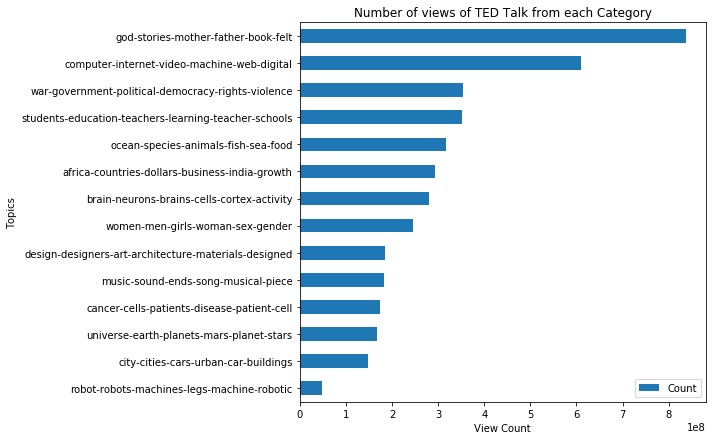

In [51]:
ax = plt.figure()
ax = tedtalk_top.plot(kind='barh',x='Topic', y='Count',figsize=[10,6])
ax.set_ylabel("Topics")
ax.set_xlabel("View Count")
# ax.set_xticks(np.arange(len(tedtalk_top['Count'])))
ax.set_yticklabels(topic_tag)#,rotation = 90)
ax = plt.tight_layout()
ax = plt.title("Number of views of TED Talk from each Category")
ax = plt.show()

### Speaker from Varying Field

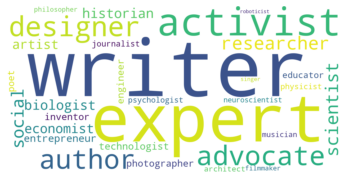

In [52]:
speaker = dict(df_main['occupation'].value_counts())

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800, collocations=False, background_color="white").generate_from_frequencies(speaker)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
df_main.head(2)

,url,film_date,views,comments,month,duration,languages,title,tags,main_speaker,transcript,topic,topic_tag,avg_sent_len,occupation,gender
0,https://www.ted.com/talks/ken_robinson_says_sc...,24-02-2006,47227110,4553,2,19.400000,60,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",Ken Robinson,Good morning. How are you?(Laughter)It's been ...,13.0,students-education-teachers-learning-teacher-s...,58.072874,author,male
1,https://www.ted.com/talks/al_gore_on_averting_...,24-02-2006,3200520,265,2,16.283333,43,Averting the climate crisis,"['alternative energy', 'cars', 'climate change...",Al Gore,"Thank you so much, Chris. And it's truly a gre...",5.0,africa-countries-dollars-business-india-growth,107.044776,advocate,male


In [54]:
df_main['popularity_score'] = df_main['views'] / df_main['comments']
df_main['popularity_score'] = df_main['popularity_score'] / sum(df_main['popularity_score'])

In [55]:
df_main.head()

,url,film_date,views,comments,month,duration,languages,title,tags,main_speaker,transcript,topic,topic_tag,avg_sent_len,occupation,gender,popularity_score
0,https://www.ted.com/talks/ken_robinson_says_sc...,24-02-2006,47227110,4553,2,19.400000,60,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",Ken Robinson,Good morning. How are you?(Laughter)It's been ...,13.0,students-education-teachers-learning-teacher-s...,58.072874,author,male,0.000285
1,https://www.ted.com/talks/al_gore_on_averting_...,24-02-2006,3200520,265,2,16.283333,43,Averting the climate crisis,"['alternative energy', 'cars', 'climate change...",Al Gore,"Thank you so much, Chris. And it's truly a gre...",5.0,africa-countries-dollars-business-india-growth,107.044776,advocate,male,0.000332
2,https://www.ted.com/talks/david_pogue_says_sim...,23-02-2006,1636292,124,2,21.433333,26,Simplicity sells,"['computers', 'entertainment', 'interface desi...",David Pogue,"(Music: ""The Sound of Silence,"" Simon & Garfun...",14.0,computer-internet-video-machine-web-digital,52.350365,historian,male,0.000362
3,https://www.ted.com/talks/majora_carter_s_tale...,25-02-2006,1697550,200,2,18.600000,35,Greening the ghetto,"['MacArthur grant', 'activism', 'business', 'c...",Majora Carter,If you're here today — and I'm very happy that...,8.0,city-cities-cars-urban-car-buildings,85.892216,activist,male,0.000233
4,https://www.ted.com/talks/hans_rosling_shows_t...,21-02-2006,12005869,593,2,19.833333,48,The best stats you've ever seen,"['Africa', 'Asia', 'Google', 'demo', 'economic...",Hans Rosling,"About 10 years ago, I took on the task to teac...",5.0,africa-countries-dollars-business-india-growth,63.189427,expert,male,0.000556


In [56]:
len(df_main[df_main['popularity_score'] >= 0.001])

190

In [144]:
df_main['popularity_score'].max(), df_main['popularity_score'].min()

(0.008868857015098737, 1.7890497511695215e-05)

In [57]:
# df_main.sort_values('popularity_score',ascending=False).groupby('topic_tag').count()

In [58]:
pop_topic = df_main.sort_values('popularity_score',ascending=False)[:190].groupby(['topic_tag'])[['views']].count().reset_index()
pop_topic.rename(columns = {'topic_tag':'Topic' , 'views':'Count'}, inplace = True)
pop_topic.sort_values('Count', ascending=False , inplace = True)
pop_topic

,Topic,Count
6,god-stories-mother-father-book-felt,32
4,computer-internet-video-machine-web-digital,24
8,ocean-species-animals-fish-sea-food,18
1,brain-neurons-brains-cells-cortex-activity,15
13,women-men-girls-woman-sex-gender,15
2,cancer-cells-patients-disease-patient-cell,14
0,africa-countries-dollars-business-india-growth,13
5,design-designers-art-architecture-materials-de...,13
3,city-cities-cars-urban-car-buildings,12
12,war-government-political-democracy-rights-viol...,10


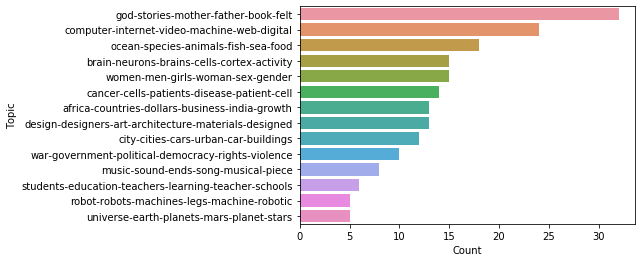

In [59]:
sns.barplot(data=pop_topic,y="Topic", x="Count")
# plt.xticks(rotation='vertical')

### Sentence Length and Popularity

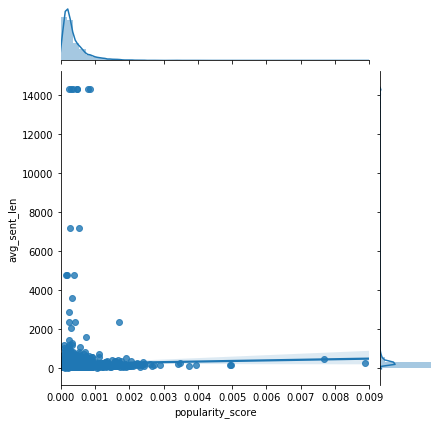

In [60]:
# sns.relplot(data = df_main, x="popularity_score", y="avg_sent_len");
sns.jointplot(data=df_main, x='popularity_score', xlim=(0,0.009), y='avg_sent_len', kind='reg')

#### We observe that as TED talk with lengthy sentences has low popularity score than the TED talks with smaller sentence length. This shows that people may get bored with lengthy talks and prefers to watch more lighter and smaller talks that are easy to follow.

### Taking out details from 'ratings' columns, it seems to contain tags associated with the TED talk

In [61]:
import ast
df_main['rating'] = df1['ratings'].apply(ast.literal_eval)
df_main['rating'].head(2)

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
Name: rating, dtype: object

In [145]:
df_main['rating'][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [62]:
# df_main['rating'][0]
#get all types of rating keyword
rating_word = dict()
# for rating in df_main['rating'].apply(lambda x: json_normalize(json.loads(x))):
for rating in df_main['rating']:
    for w in rating:
        if w['name'] not in rating_word.keys():
            rating_word[w['name']] = 0
        else:
            rating_word[w['name']] += w['count']
rating_word

{'Funny': 353876,
 'Beautiful': 457422,
 'Ingenious': 358729,
 'Courageous': 401100,
 'Longwinded': 79241,
 'Confusing': 50643,
 'Informative': 851315,
 'Fascinating': 753491,
 'Unconvincing': 128612,
 'Persuasive': 531429,
 'Jaw-dropping': 350739,
 'OK': 196120,
 'Obnoxious': 61778,
 'Inspiring': 1262901}

In [63]:
pos_word = {'Beautiful' , 'Courageous', 'Fascinating', 'Funny', 'Informative', 'Ingenious', 'Inspiring', 
            'Jaw-dropping', 'Persuasive'}
neg_word = {'Longwinded', 'Obnoxious', 'Unconvincing', 'Confusing'}
neutral = {'OK'}

In [64]:
desc = [x for _,x in sorted(zip([rating_word.values()], rating_word.keys()), reverse=True)]
desc

['Funny']

In [65]:
list(rating_word.keys())[0]

'Funny'

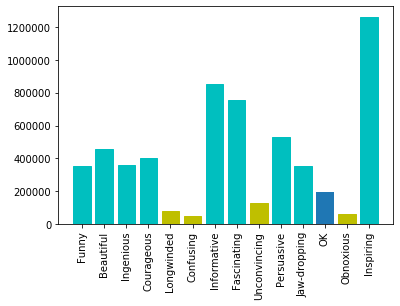

In [66]:
# sns.barplot(data=rating_word,x=rating_word.keys(), y = rating_word.values())
neg_ind = [i for i in range(len(rating_word)) if list(rating_word.keys())[i] in neg_word]
pos_ind = [i for i in range(len(rating_word)) if list(rating_word.keys())[i] in pos_word]
bar = plt.bar(range(len(rating_word)), list(rating_word.values()), align='center')
[bar[i].set_color('y') for i in neg_ind]
[bar[i].set_color('c') for i in pos_ind]
plt.xticks(range(len(rating_word)), list(rating_word.keys()), rotation=90)
# plt.xticks(ind, rating_word, rotation=90, ha="right")
plt.show()

In [67]:
# json_normalize(json.loads(df_main['rating'][0]))['count'].sum()
#df_main['rating_cnt'] = df_main['rating'].apply(lambda x: json_normalize(json.loads(x))['count'].sum())

In [68]:
sentiment = ['positive', 'negative', 'neutral']
sent_labl = []
for rating in df_main['rating']:
    pos_cnt = 0
    neg_cnt = 0
    neutral = 0
    for w in rating:
        if w['name'] in pos_word:
            pos_cnt += w['count']
        elif w['name'] in neg_word:
            neg_cnt += w['count']
        else:
            neutral += w['count']
    ind = np.argmax([pos_cnt, neg_cnt, neutral])
    sent_labl.append(sentiment[ind])
# len(sent_labl)
df_main['sentiment_label'] = np.array(sent_labl)

In [69]:
df_main['sentiment_label'].value_counts()

positive    2386
negative      13
Name: sentiment_label, dtype: int64

In [70]:
df_main.head(3)

,url,film_date,views,comments,month,duration,languages,title,tags,main_speaker,transcript,topic,topic_tag,avg_sent_len,occupation,gender,popularity_score,rating,sentiment_label
0,https://www.ted.com/talks/ken_robinson_says_sc...,24-02-2006,47227110,4553,2,19.400000,60,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",Ken Robinson,Good morning. How are you?(Laughter)It's been ...,13.0,students-education-teachers-learning-teacher-s...,58.072874,author,male,0.000285,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",positive
1,https://www.ted.com/talks/al_gore_on_averting_...,24-02-2006,3200520,265,2,16.283333,43,Averting the climate crisis,"['alternative energy', 'cars', 'climate change...",Al Gore,"Thank you so much, Chris. And it's truly a gre...",5.0,africa-countries-dollars-business-india-growth,107.044776,advocate,male,0.000332,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",positive
2,https://www.ted.com/talks/david_pogue_says_sim...,23-02-2006,1636292,124,2,21.433333,26,Simplicity sells,"['computers', 'entertainment', 'interface desi...",David Pogue,"(Music: ""The Sound of Silence,"" Simon & Garfun...",14.0,computer-internet-video-machine-web-digital,52.350365,historian,male,0.000362,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",positive


C:\Users\Arti\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Arti\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x864 with 0 Axes>

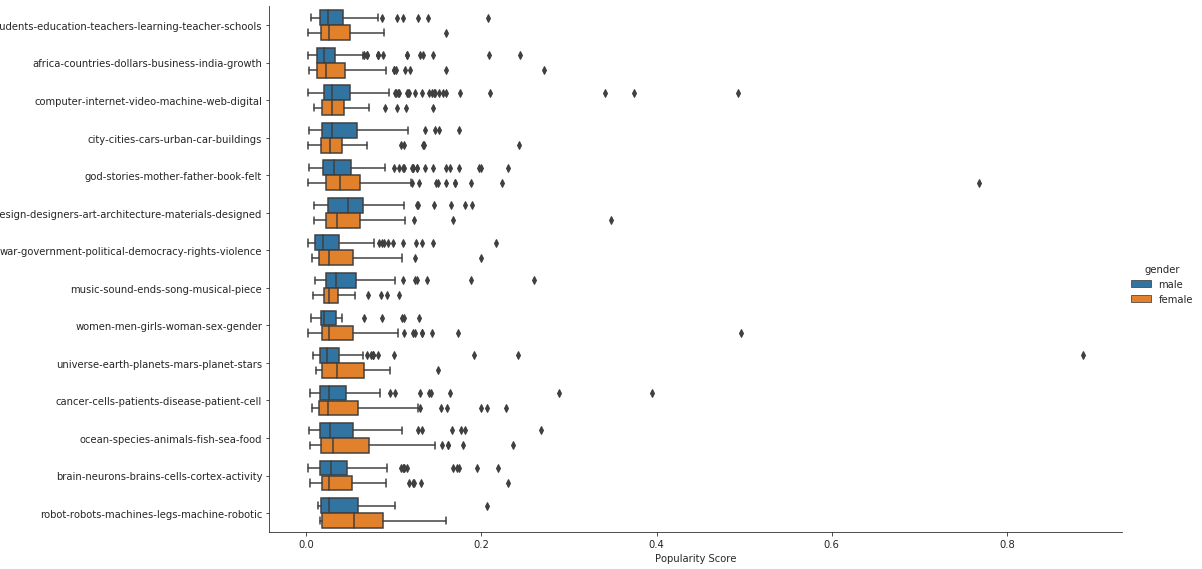

In [71]:
plt.figure(figsize=(30,12))
df_main['pscore'] = df_main['popularity_score'] * 100
with sns.axes_style(style='ticks'):
    g = sns.factorplot("pscore", "topic_tag", "gender", data=df_main, kind="box",size=8, aspect=2)
    g.set_axis_labels("Popularity Score", "TED Talk Category")
#     g.set_xticklabels(rotation=90)

#### Observtion
1. We can observe many outliers, on which we can't generalize a particular topic to be popular only if it has a single TED Talk with high popularity.
2. Secondly, one can observe that in 90% of the TED Talk categories, female outbar male in sense of popularity score. So we can say that TED Talks given by female are more popular when compared to male.

In [72]:
df_main.columns

Index(['url', 'film_date', 'views', 'comments', 'month', 'duration',
       'languages', 'title', 'tags', 'main_speaker', 'transcript', 'topic',
       'topic_tag', 'avg_sent_len', 'occupation', 'gender', 'popularity_score',
       'rating', 'sentiment_label', 'pscore'],
      dtype='object')

In [73]:
final_df = df_main[['duration','languages','topic','avg_sent_len','occupation','gender','sentiment_label','pscore']].copy()

In [74]:
final_df.to_csv("dataset/final_data.csv",index=False)